In [16]:
from sklearn.externals import joblib
import matplotlib.pyplot as plt
%matplotlib inline

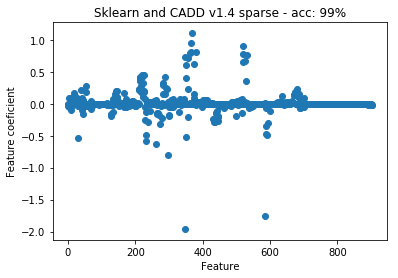

In [26]:
# Load model
model_file = "/tmp/gin-train/bcf1796306f64f8992274585932cf870/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.4 sparse - acc: 99%")
plt.show()

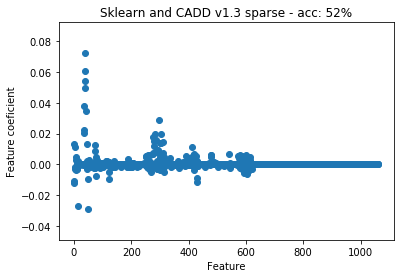

In [24]:
# Load model
model_file = "/tmp/gin-train/6d1e6049c11b48b7b02a1856d421cbab/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.3 sparse - acc: 52%")
plt.show()

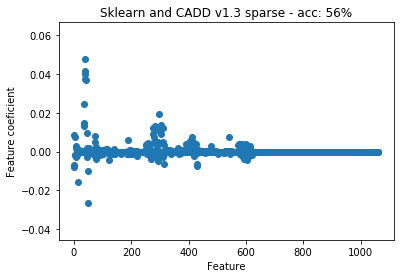

In [25]:
# Load model
model_file = "/tmp/gin-train/62cdc2663f484ba9a9614dcd8283aad9/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_.shape[1]), clf.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn and CADD v1.3 sparse - acc: 56%")
plt.show()

## Verify DataSets

In [4]:
from kipoi_cadd.data import CaddSparseDataset, cadd_sparse_train_valid_data_one, sparse_cadd_dataset
from kipoi_cadd.models import logistic_regression_keras
from sklearn.externals import joblib

sparse_matrix = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/sparse_matrices/sample_10k.npz"
variant_ids_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/variant_ids/sample_10k.pkl"

In [5]:
model_cadd_dir = "/s/project/kipoi-cadd/data/models/CADD1.4-GRCh37.mod"
model_cadd, scaler_cadd = joblib.load(model_cadd_dir)

/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [5]:
# Train
batch_size = 16

"""
train_it = training_ds.batch_train_iter(batch_size=batch_size,shuffle=True,num_workers=1)
next(train_it)
valid_it = validation_ds.batch_train_iter(batch_size=batch_size,shuffle=True,num_workers=1)
next(valid_it)
model.fit_generator(train_it,epochs=1,
                     steps_per_epoch=max(int(len(training_ds) / batch_size), 1),
                     validation_data=valid_it,
                     validation_steps=max(int(len(validation_ds) / batch_size), 1)
                     )
"""
training_ds, validation_ds = cadd_sparse_train_valid_data_one(sparse_cadd_dataset(sparse_matrix, variant_ids_file))
model = logistic_regression_keras(904)
(x_train, y_train), (x_valid, y_valid) = training_ds.load_all(), validation_ds.load_all()
x_train = x_train.toarray()
x_train = scaler.transform(x_train)
model.fit(x_train, y_train, validation_data=(x_valid, y_valid))

Train on 7000 samples, validate on 3000 samples
Epoch 1/1
7000/7000 [==============================] - 1s 163us/step - loss: 0.5648 - mean_absolute_error: 0.0971 - binary_accuracy: 0.9517 - val_loss: 1.3316 - val_mean_absolute_error: 0.1008 - val_binary_accuracy: 0.8953


In [37]:
# Train
from kipoi_cadd.models import logistic_regression_scikit
model_sklearn = logistic_regression_scikit(max_iter=30)
training_ds, validation_ds = cadd_sparse_train_valid_data_one(sparse_cadd_dataset(sparse_matrix, variant_ids_file))
(x_train, y_train), (x_valid, y_valid) = training_ds.load_all(), validation_ds.load_all()
# x_train = scaler_cadd.transform(x_train)
model_sklearn.fit(x_train, y_train)
print(model_sklearn.score(x_train, y_train))

/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


1.0


/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished


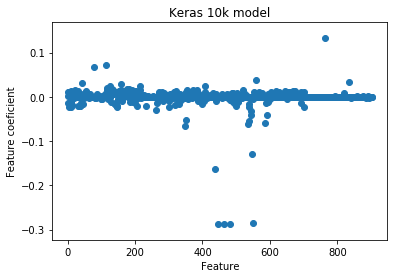

In [36]:
# Load model
plt.scatter(range(model.get_weights()[0].shape[0]), model.get_weights()[0]);
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Keras 10k model")
plt.show()

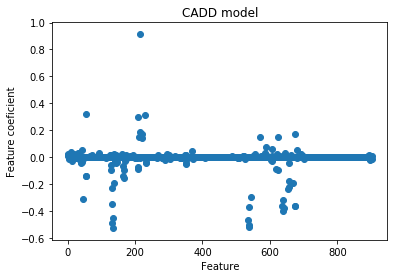

In [50]:
# Load model
from keras.models import load_model
model_file = "/tmp/gin-train/cd20a39802ab46aa949a1b6beb572051/model.h5"
clf = load_model(model_file)
plt.scatter(range(clf.get_weights()[0].shape[0]), clf.get_weights()[0]);
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Keras 10k model")
plt.show()

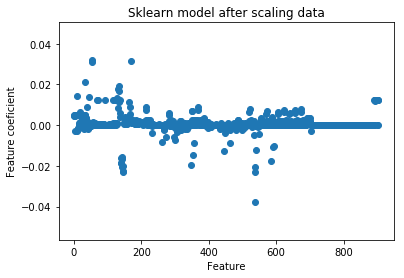

In [9]:
# Load model
model_file = "/tmp/gin-train/340a604cd72541ac957145df90687ebf/model.h5"
clf = joblib.load(model_file)
plt.scatter(range(clf.coef_[0].shape[0]), clf.coef_[0]);
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("Sklearn model after scaling data")
plt.show()

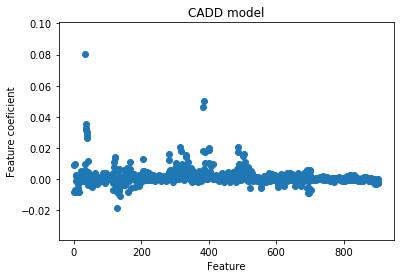

In [25]:
# Load model
plt.scatter(range(model_cadd.coef_.shape[1]), model_cadd.coef_.ravel());
plt.xlabel("Feature")
plt.ylabel("Feature coeficient")
plt.title("CADD model")
plt.show()

In [37]:
from kipoi.data_utils import numpy_collate_concat
from sklearn.metrics import confusion_matrix
from tqdm import tqdm

# Evaluate
lpreds = []
llabels = []
for inputs, targets in tqdm(validation_ds.batch_train_iter(cycle=False,
                                                           num_workers=1,
                                                           batch_size=batch_size),
                            total=len(validation_ds) // batch_size
                            ):
    pre = model.predict_on_batch(inputs).ravel()
    lpreds.append(pre)
    llabels.append(targets)
print("Finished getting validation predictions.")
preds = numpy_collate_concat(lpreds)
labels = numpy_collate_concat(llabels)
del lpreds
del llabels

# print("labels", labels[:10])
# print("preds", preds[:10], preds[:10].ravel())

print("Confusion matrix:\n", confusion_matrix(labels, preds.round()))

188it [00:01, 165.03it/s]                        

Finished getting validation predictions.
Confusion matrix:
 [[1566   14]
 [  24 1396]]


## Get accuracy with their model

In [1]:
from sklearn.externals import joblib
from kipoi_cadd.data import CaddSparseDataset

model_cadd_dir = "/s/project/kipoi-cadd/data/models/CADD1.4-GRCh37.mod"
train_npz_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/sparse_matrices/train.npz"
train_id_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/variant_ids/train.pkl"

Using TensorFlow backend.


In [2]:
model_cadd, scaler_cadd = joblib.load(model_cadd_dir)

/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/kipoi-cadd2/lib/python3.6/site-packages/sklearn/base.py:251: UserWarning: Trying to unpickle estimator StandardScaler from version 0.19.1 when using version 0.20.0. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [ ]:
ds = CaddSparseDataset(train_npz_file, train_id_file, "v1.4")
X, y = ds.load_all()
y_pred = model_cadd.predict(X)

In [11]:
X_scaled = scaler.transform(X)

In [28]:
print(model_cadd.C)
print(model_cadd.tol)
print(model_cadd.solver)
print(model_cadd.multi_class)
print(model_cadd.max_iter)
print(model_cadd.n_iter_)

1.0
0.0001
lbfgs
ovr
1
[0]


In [9]:
print(model_cadd.intercept_)
print(model_cadd.penalty)
print(model_cadd.warm_start)
print(model_cadd.class_weight)

[-0.00112064]
l2
True
None


In [12]:
model_cadd.score(X_scaled, y)

0.655182476199949

In [14]:
mylastmodel_dir = "/tmp/gin-train/677208ea6cad4110af558694689cb420/model.h5"
mylastmodel = joblib.load(mylastmodel_dir)

In [15]:
mylastmodel.score(X_scaled, y)

0.5285277311588119

In [11]:
myscaledmodel_dir = "/tmp/gin-train/a8eb036bfe3a495bbbcfc434e1c59bdd/model.h5"
myscaledmodel = joblib.load(myscaledmodel_dir)

In [27]:
myscaledmodel.score(X_scaled, y)

0.953777207456375

## Get my own scaler

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib
from kipoi_cadd.data import CaddSparseDataset

scaler_kipoicadd_file = "/s/project/kipoi-cadd/data/models/KipoiCadd-GRCh37.scaler"
scaler_kipoicadd_train_file = "/s/project/kipoi-cadd/data/models/KipoiCadd_train-GRCh37.scaler"
train_npz_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/sparse_matrices/train.npz"
train_id_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/variant_ids/train.pkl"
all_npz_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/sparse_matrices/all.npz"
all_id_file = "/s/project/kipoi-cadd/data/raw/v1.4/training_data/GRCh37/variant_ids/all.pkl"

In [8]:
"""
ds = CaddSparseDataset(all_npz_file, all_id_file, "v1.4")
scaler_kipoicadd = StandardScaler(copy=True, with_mean=False, with_std=True)
X_all, y_all = ds.load_all()
scaler_kipoicadd.fit(X_all)
joblib.dump(scaler_kipoicadd, scaler_kipoicadd_file)
"""

'\nds = CaddSparseDataset(all_npz_file, all_id_file, "v1.4")\nscaler_kipoicadd = StandardScaler(copy=True, with_mean=False, with_std=True)\nX_all, y_all = ds.load_all()\nscaler_kipoicadd.fit(X_all)\njoblib.dump(scaler_kipoicadd, scaler_kipoicadd_file)\n'

In [5]:
ds = CaddSparseDataset(train_npz_file, train_id_file, "v1.4")
scaler_kipoicadd_train = StandardScaler(copy=True, with_mean=False, with_std=True)
X_all, y_all = ds.load_all()
scaler_kipoicadd_train.fit(X_all)
joblib.dump(scaler_kipoicadd_train, scaler_kipoicadd_train_file)

['/s/project/kipoi-cadd/data/models/KipoiCadd_train-GRCh37.scaler']

In [9]:
scaler_kipoicadd = joblib.load(scaler_kipoicadd_file)

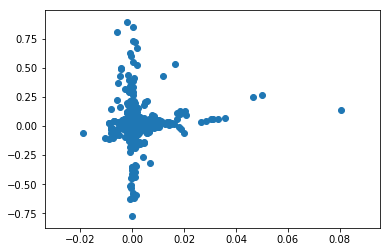

In [12]:
import matplotlib.pyplot as plt
plt.scatter(model_cadd.coef_, myscaledmodel.coef_);
plt.show()

In [25]:
%matplotlib inline

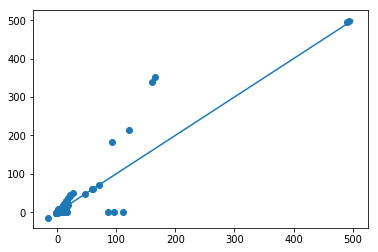

In [26]:
import matplotlib.pyplot as plt
plt.scatter(scaler_kipoicadd.mean_, scaler_cadd.mean_);
# plt.scatter(range(scaler_kipoicadd.mean_.shape[0]), scaler_kipoicadd.mean_);
plt.plot([0, 500], [0, 500])

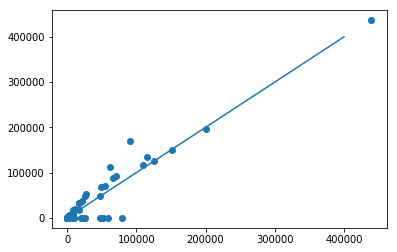

In [27]:
import matplotlib.pyplot as plt
plt.scatter(scaler_kipoicadd.var_, scaler_cadd.var_);
plt.plot([0, 500000], [0, 500000])